In [1]:
#%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
 # Get the last date and calculate the date one year ago
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date


('2017-08-23',)

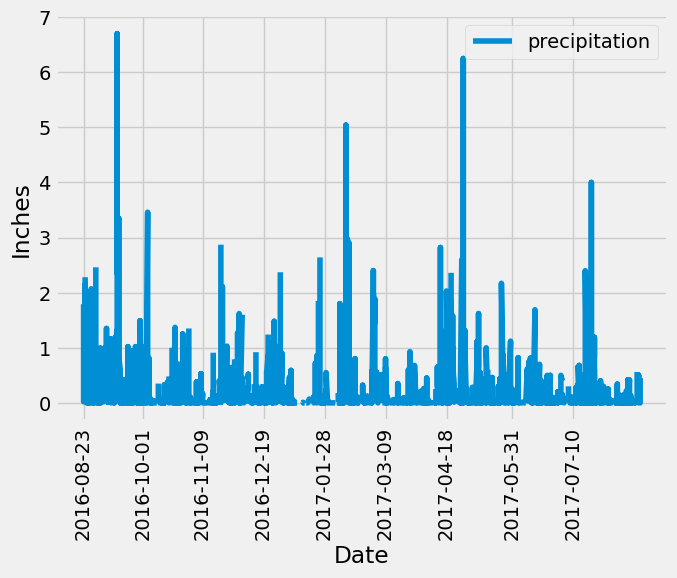

In [17]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_date_str = most_recent_date[0]

# Convert the string date to a datetime object
most_recent_date_dt = dt.datetime.strptime(most_recent_date_str, '%Y-%m-%d')

# Calculate the date one year from the last date in data set.
one_year_earlier = most_recent_date_dt - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).\
   filter(Measurement.date >= one_year_earlier - dt.timedelta(days=1)).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(results, columns=['date', 'precipitation'])

# Sort the dataframe by date
precipitation_df = precipitation_df.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(7, 6))
plt.plot(precipitation_df['date'], precipitation_df['precipitation'])

# Define specific dates as datetime objects for x-axis ticks
tick_dates = ['2016-08-23', '2016-10-01', '2016-11-09', '2016-12-19','2017-01-28', '2017-03-09','2017-04-18', '2017-05-31','2017-07-10']
# tick_dates = [date for date in tick_dates]

# Set x-axis ticks with the specific dates, ensuring proper date alignment
plt.xticks(tick_dates, rotation=90)

# Set labels and position the legend
plt.xlabel('Date')
plt.ylabel('Inches')
plt.legend(['precipitation'], loc='upper right')
plt.xticks(rotation=90)

# Add a grid and apply tight layout
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
stations = session.query(func.count(Station.station)).all()
stations

[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temperature_stats = session.query(func.min(Measurement.tobs),
                    func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
                    filter(Measurement.station == 'USC00519281').all()

temperature_stats

[(54.0, 85.0, 71.66378066378067)]

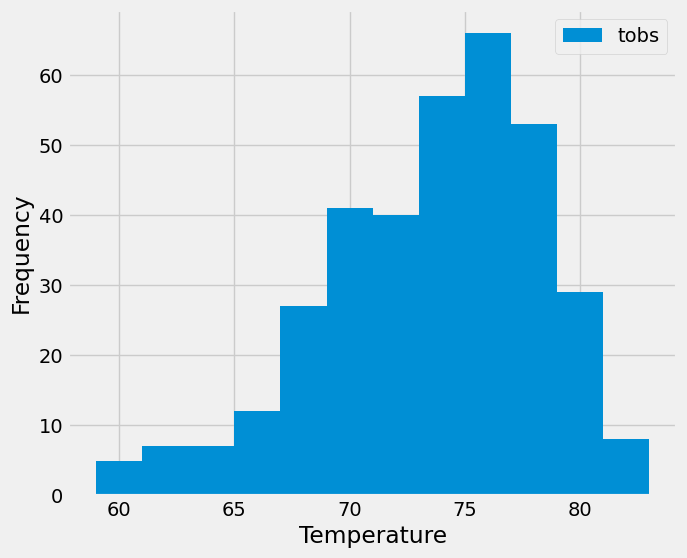

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temp_data = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= one_year_earlier - dt.timedelta(days=1)).all()

#Creating a dataframe from the temperature list 
temperature_df = pd.DataFrame(temp_data, columns=['temperature'])

# Plot the histogram
plt.figure(figsize=(7, 6))
plt.hist(temperature_df['temperature'], bins=12, label='tobs')

# Set labels
plt.xlabel('Temperature')
plt.ylabel('Frequency')

plt.legend()

# Show the plot
plt.show()

# Close Session

In [16]:
# Close Session
session.close()